In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:

try:
    # Cчитаем данные из csv файла
    data = pd.read_csv('2019_nCoV_data.csv')
    
    # Удаляем не нужные столбцы
    del data['Sno']
    del data['Last Update']
    
    # Проверим данные на дубликаты
    print('Дубликатов: ', sum(data.duplicated(['Country', 'Province/State', 'Date'])))
    
    # Объединим данные для анализа
    data.loc[data['Country'] == 'Mainland China', 'Country'] = 'China'
    
    # Приведем даты к единообразному представлению
    # И добавим столбец с датой
    data['Date'] = pd.to_datetime(data['Date'])
    data['Date_date'] = data['Date'].apply(lambda x:x.date())

except FileNotFoundError as err:
    print('Файл не найден', err)


Дубликатов:  0


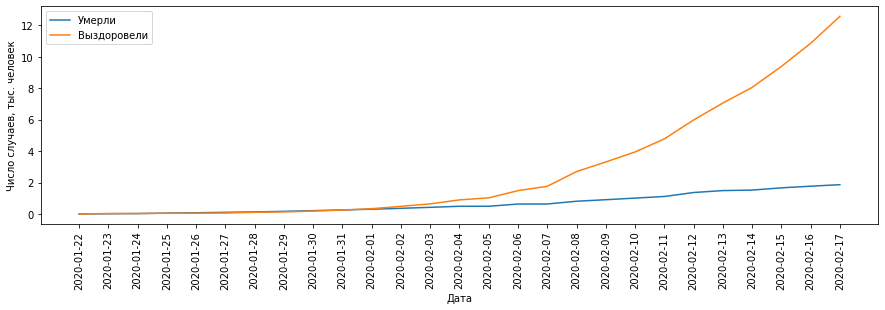

In [48]:
# Выведем график умерщих и выздоровивших
d = {"Deaths":"Умерли", "Recovered":"Выздоровели"}

fig, subplot = plt.subplots()

for label in d:
    plt.plot(df_by_date["Date_date"],
             df_by_date[label]/1000,
             label=d[label])

plt.ylabel('Число случаев, тыс. человек')
plt.xlabel('Дата')
plt.xticks(df_by_date["Date_date"], rotation='vertical')
fig.set_figwidth(15)    #  ширина
plt.legend()
plt.show()

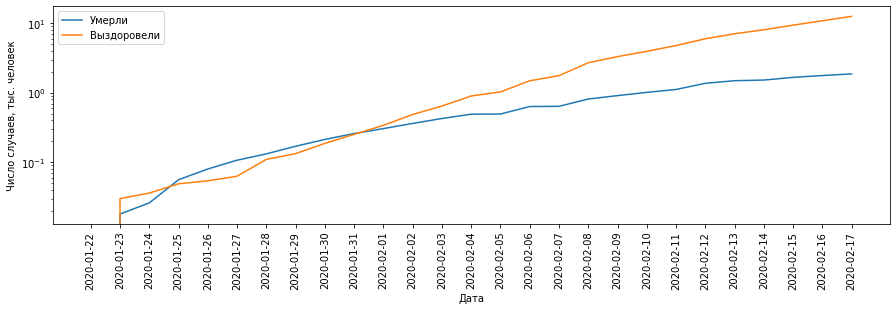

In [52]:
# Построим данные в полулогарифмическом масштабе
fig, subplot = plt.subplots()
plt.yscale('log')

for label in d:
    plt.plot(df_by_date["Date_date"],
             df_by_date[label]/1000,
             label=d[label])

plt.ylabel('Число случаев, тыс. человек')
plt.xlabel('Дата')
plt.xticks(df_by_date["Date_date"], rotation='vertical')
fig.set_figwidth(15)
plt.legend()
plt.show()

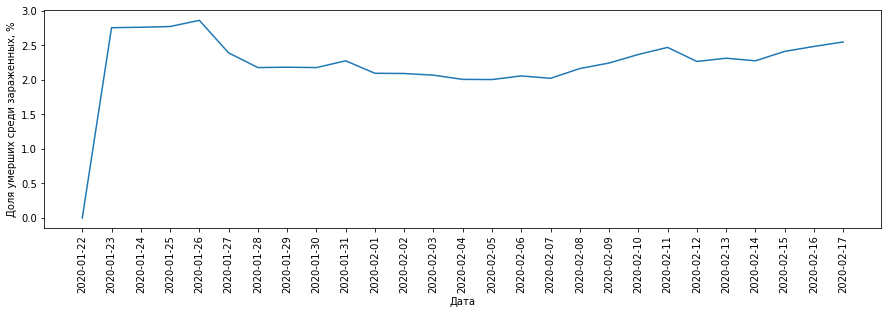

In [55]:
# Грубая оценка летальности
fig, subplot = plt.subplots()
plt.plot(df_by_date["Date_date"],
         df_by_date['Deaths']/df_by_date['Confirmed']*100)

plt.ylabel('Доля умерших среди зараженных, %')
plt.xlabel('Дата')
plt.xticks(df_by_date["Date_date"], rotation='vertical')
fig.set_figwidth(15)
plt.show()

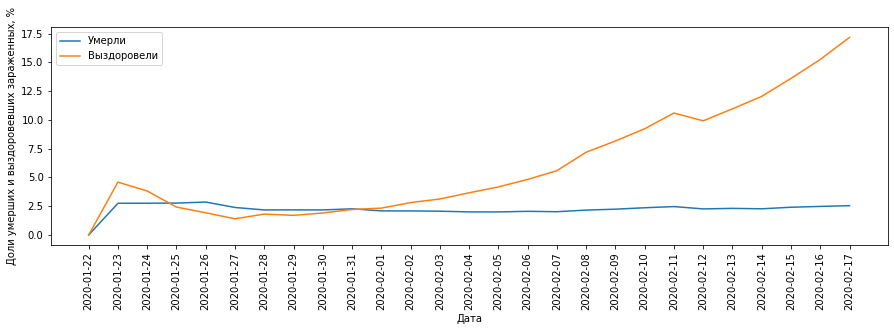

In [56]:
# Сравним рассмотренную динамику летальности с динамикой выздоровления
fig, subplot = plt.subplots()
for label in d:
    plt.plot(df_by_date["Date_date"],
             df_by_date[label]/df_by_date['Confirmed']*100,
             label=d[label])

plt.ylabel('Доли умерших и выздоровевших зараженных, %')
plt.xlabel('Дата')
plt.xticks(df_by_date["Date_date"], rotation='vertical')
fig.set_figwidth(15)
plt.legend()
plt.show()

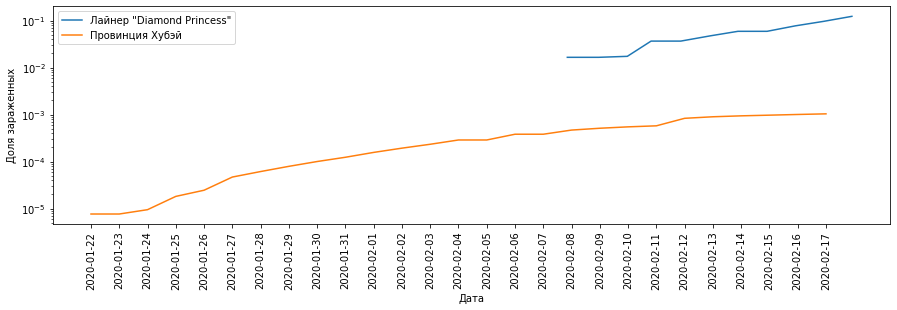

In [63]:
# Так как эпидемия была зафиксирована на лайнере Diamond Princess.
# Рассмотрим упоминавшийся случай между провинции Хубэй (ставшей очагом распространения болезни) 
# и лайнером Diamond Princess.
fig, subplot = plt.subplots()
diamond = data[data["Country"]=="Others"]
hubei = data[data["Province/State"]=="Hubei"]

plt.plot(diamond["Date"],
         diamond["Confirmed"]/3700,
         label='Лайнер "Diamond Princess"')

plt.plot(hubei["Date_date"],
         hubei["Confirmed"]/58e6,
         label="Провинция Хубэй")

plt.yscale('log')
plt.xlabel("Дата")
plt.ylabel("Доля зараженных")
plt.xticks(df_by_date["Date_date"], rotation='vertical')
fig.set_figwidth(15)
plt.legend()
plt.show()

# Заключение
1. Очаг вируса имеет локализованный характер. Большинство заболевших сконцентрированы в провинции Китая Хубей. Примерно половина зараженных за пределами Китая – это пассажиры и члены команды круизного лайнера Diamond Princess.
2. Текущая летальность вируса по грубой оценке колеблется в диапазоне 2–3%. Эта оценка также попадает в более строго рассчитанный коридор в 0,4–4%. Для сравнения: летальность другого коронавируса, атипичной пневмонии составляет 9,6%.
3. В течение первой недели летальность доминировала над выздоравливаемостью, но сейчас вылечивается всё больше людей.